In [1]:
import pandas as pd
import dtale

In [2]:
ckg=pd.read_csv('datasets/claims kg/ckg.csv')



In [3]:
ckg.shape # True and false problem

(10000, 14)

In [4]:
ckg.ratingName.value_counts()


False    7366
True     2634
Name: ratingName, dtype: int64

In [5]:
ckg.columns

Index(['id', 'text', 'date', 'truthRating', 'ratingName', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

In [6]:
ckg.isna().sum()/(len(ckg))*100


id                         0.00
text                       0.00
date                       0.00
truthRating                0.00
ratingName                 0.00
author                     0.00
headline                   0.00
named_entities_claim       0.23
named_entities_article    33.42
keywords                   6.64
source                     0.00
sourceURL                  0.00
link                       0.00
language                   0.00
dtype: float64

In [7]:
ckg.keywords
#id not required
#text is req
#date is unknown not null , but ignore anyway
#truthRating can be 1 or 3 where all 1 are false and 3 are true drop this
#rating Name 
#author is also empty
#headline is good
#named_entities claim is from headline
#named_entities article is from text
#keywords  - discretion 
#source is unimportant , but left to discretion
#source URl not required
#link also not required
#all lang are english



0                                      politics, ted cruz
1                            911 calls, domestic violence
2                                             ASP Article
3                               ASP Article, barack obama
4                        ASP Article, Parental Nightmares
                              ...                        
9995             abortion, ar-15, political garbage chute
9996    donald trump, election 2016, hillary clinton, ...
9997    #notmypresident, anti-trump protests, fox news...
9998                                      alcohol, health
9999                                          ASP Article
Name: keywords, Length: 10000, dtype: object

In [8]:
"""
Route 1 :
Attirbutes : text, rating Name, headline  , keywords , source(up to the person)


"""

'\nRoute 1 :\nAttirbutes : text, rating Name, headline  , keywords , source(up to the person)\n\n\n'

In [9]:
ckg.drop(columns=['id','date','truthRating','author','named_entities_claim','named_entities_article','sourceURL','link','language'],inplace=True)

In [10]:
ckg.dropna(inplace=True)

In [11]:
ckg.isna().sum()/(len(ckg))*100
ckg.rename(columns={'ratingName':'label'},inplace=True)

In [12]:
ckg.columns

Index(['text', 'label', 'headline', 'keywords', 'source'], dtype='object')

In [13]:
ckg_x=ckg.drop(columns=['label'])
ckg_y=ckg['label']

#splitting x and y . y is to be predicted !!
print(ckg_x.shape)
print(ckg_y.shape)


(9336, 4)
(9336,)


In [14]:
ckg_x.columns

Index(['text', 'headline', 'keywords', 'source'], dtype='object')

In [15]:
#train test split to form test from megaset
from sklearn.model_selection import train_test_split

X_train_temp, ckg_test_x, y_train_temp, ckg_test_y = train_test_split(ckg_x,ckg_y,test_size=0.1,random_state=12)
print(X_train_temp.size)
print(ckg_test_x.size)

# mega_test_x : Final testing file with statements
# mega_test_y : Final testing file with ratings

ckg_train_x, ckg_dev_x, ckg_train_y, ckg_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=ckg_test_x['text'].size,random_state=12)

print(ckg_train_x.size)
print(ckg_dev_x.size)


print(type(ckg_train_x))
print("Final size of train/dev/test : ",ckg_train_x['text'].size,"/",ckg_dev_x['text'].size,"/",ckg_test_x['text'].size)

33608
3736
29872
3736
<class 'pandas.core.frame.DataFrame'>
Final size of train/dev/test :  7468 / 934 / 934


In [16]:
import tensorflow
import pandas as pd
import keras 
import numpy as np

Using TensorFlow backend.


In [17]:
#use this tokenizer for data sent
from keras.preprocessing.text import Tokenizer
def tokenize(train_data,dev_data,test_data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(train_data)


  em_data_train = tokenizer.texts_to_sequences(train_data)
  em_data_dev= tokenizer.texts_to_sequences(dev_data)
  em_data_test=tokenizer.texts_to_sequences(test_data)
  #em_data_train=emeded training data
  #em_data_dev=emeded dev data

  vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
  print(vocab_size)


  return em_data_train,em_data_dev,em_data_test,vocab_size
#it reurn the tokenzied train and dev data and the vocab size of the data  

In [18]:
#padding the data to be sent 
from keras.preprocessing.sequence import pad_sequences

def padding(token_train_data,token_dev_data,token_test_data):
  maxlen=0
  for i in token_train_data:
    if(len(i)>maxlen):
        maxlen=len(i)
  print(maxlen)


  em_data_train_pad= pad_sequences(token_train_data, padding='post', maxlen=maxlen)
  em_data_dev_pad= pad_sequences(token_dev_data, padding='post', maxlen=maxlen)
  em_data_test_pad= pad_sequences(token_test_data, padding='post', maxlen=maxlen)

  return em_data_train_pad,em_data_dev_pad,em_data_test_pad,maxlen
#it return the padded data and the max len of the data

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [20]:
#sending the data to the tokenizer to tokenize the data
em_data_train_text,em_data_dev_text,em_data_test_text,text_vocabsize=tokenize(ckg_train_x.text,ckg_dev_x.text,ckg_test_x.text)
em_data_train_headline,em_data_dev_headline,em_data_test_headline,headline_vocabsize=tokenize(ckg_train_x.headline,ckg_dev_x.headline,ckg_test_x.headline)
em_data_train_keywords,em_data_dev_keywords,em_data_test_keywords,keywords_vocabsize=tokenize(ckg_train_x.keywords,ckg_dev_x.keywords,ckg_test_x.keywords)
em_data_train_source,em_data_dev_source,em_data_test_source,source_vocabsize=tokenize(ckg_train_x.source,ckg_dev_x.source,ckg_test_x.source)

17521
13380
4083
5


In [21]:
#sending the tokenized data to padding 
em_data_train_padtext,em_data_dev_padtext,em_data_test_padtext,text_maxlen=padding(em_data_train_text,em_data_dev_text,em_data_test_text)
em_data_train_padheadline,em_data_dev_padheadline,em_data_test_padheadline,headline_maxlen=padding(em_data_train_headline,em_data_dev_headline,em_data_test_headline)
em_data_train_padkeywords,em_data_dev_padkeywords,em_data_test_padkeywords,keywords_maxlen=padding(em_data_train_keywords,em_data_dev_keywords,em_data_test_keywords)
em_data_train_padsource,em_data_dev_padsource,em_data_test_padsource,source_maxlen=padding(em_data_train_source,em_data_dev_source,em_data_test_source)

123
38
24
1


In [24]:
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import GlobalMaxPool1D,GlobalAveragePooling1D
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D  

embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

text_in = Input(shape=(123,), name='text_in')
headline_in = Input(shape=(38,), name='headline_in')
keywords_in = Input(shape=(24,), name='keywords_in')
source_in = Input(shape=(1,), name='source_in')

text_embed = Embedding(output_dim=embedding_dim, input_dim=17521, input_length=123)(text_in)
headline_embed = Embedding(output_dim=embedding_dim, input_dim=17521, input_length=38)(headline_in)
keywords_embed = Embedding(output_dim=embedding_dim, input_dim=17521, input_length=24)(keywords_in)
source_embed = Embedding(output_dim=embedding_dim, input_dim=17521, input_length=1)(source_in)


te = Conv1D(h1,kernel_size=(1) ,activation='relu',data_format='channels_first')(text_embed)
h = Conv1D(h1,kernel_size=(1) ,activation='relu',data_format='channels_first')(headline_embed)
kw = Conv1D(h1,kernel_size=(1) ,activation='relu',data_format='channels_first')(keywords_embed)
src= Conv1D(h1,kernel_size=(1) ,activation='relu',data_format='channels_first')(source_embed)


text_pool = GlobalMaxPool1D()(te)
headline_pool = GlobalMaxPool1D()(h)
keywords_pool = GlobalMaxPool1D()(kw)
source_pool = GlobalMaxPool1D()(src)

all_d = concatenate([text_pool, headline_pool,keywords_pool,source_pool])

d1 = Dense(10, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activity_regularizer=l2(0.1))(all_d)
#d2 = Dense(44, activation='relu')(d1)
drop= Dropout(0.4)(d1)
op = Dense(1, activation='sigmoid', name='op')(drop)




model = Model(inputs=[text_in,headline_in,keywords_in,source_in], outputs=[op])

model.summary()

16 10
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_in (InputLayer)            (None, 123)          0                                            
__________________________________________________________________________________________________
headline_in (InputLayer)        (None, 38)           0                                            
__________________________________________________________________________________________________
keywords_in (InputLayer)        (None, 24)           0                                            
__________________________________________________________________________________________________
source_in (InputLayer)          (None, 1)            0                                            
______________________________________________________________________________________

C:\Users\Rahul\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7468 samples, validate on 934 samples
Epoch 1/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.6415 - acc: 0.7366 - val_loss: 0.5881 - val_acc: 0.7302
Epoch 2/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.5492 - acc: 0.7366 - val_loss: 0.5654 - val_acc: 0.7302
Epoch 3/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.4405 - acc: 0.7924 - val_loss: 0.5659 - val_acc: 0.7516
Epoch 4/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.3297 - acc: 0.9462 - val_loss: 0.5666 - val_acc: 0.7484
Epoch 5/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.2742 - acc: 0.9526 - val_loss: 0.5675 - val_acc: 0.7441
Epoch 6/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.2332 - acc: 0.9723 - val_loss: 0.5748 - val_acc: 0.7291
Epoch 7/20
7468/7468 [==============================] - 19s 3ms/step - loss: 0.2010 - acc: 0.9807 - val_loss: 0.5742 - val_acc: 0.7388
Epoch 8/

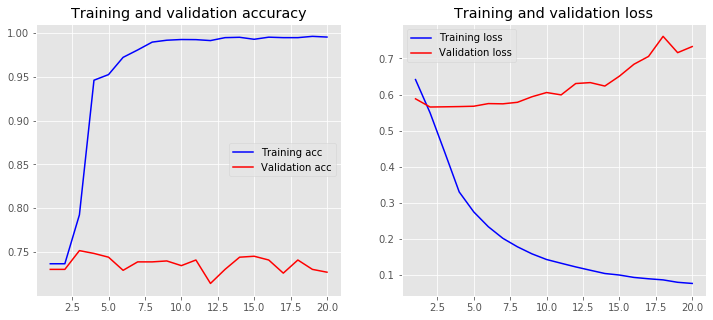

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['acc'])
h=model.fit({'text_in': em_data_train_padtext, 'headline_in': em_data_train_padheadline, 'keywords_in':em_data_train_padkeywords,'source_in':em_data_train_padsource},{'op': ckg_train_y},
          epochs=20, batch_size=8,validation_data=({'text_in': em_data_dev_padtext, 'headline_in': em_data_dev_padheadline, 'keywords_in':em_data_dev_padkeywords,'source_in':em_data_dev_padsource},{'op': ckg_dev_y}))
plot_history(h)